Строганов ИУ5-61Б РК1 Вариант 17

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

### Загрузка данных

Загрузим набор данных "Ирисы Фишера"

In [2]:
iris_dataset = load_iris()
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Разделим данные на признаки и метки

In [3]:
X, y = iris_dataset['data'], iris_dataset['target']

Проверим на пропуски в данных

In [4]:
np.sum(np.isnan(X))

0

### Масштабирование

Для того, чтобы признак принадлежал отрезу [0; 1] применим min_max scaling. Стандартизацию не использую потому что в итоге получим отрицательное значение длины листка

In [5]:
import numpy as np

min_values = np.min(X, axis=0)
max_values = np.max(X, axis=0)

X_scaled = (X - min_values) / (max_values - min_values)

In [6]:
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

### Дополнительные требования по группам (для пары произвольных колонок данных построить график "Диаграмма рассеяния")

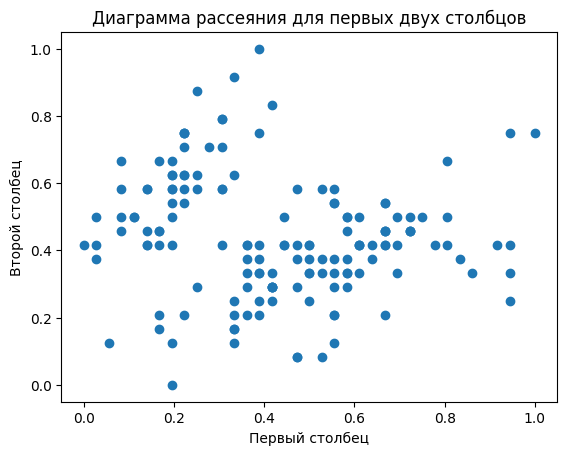

In [7]:
import matplotlib.pyplot as plt

x_values = X_scaled[:, 0] # Первый столбец
y_values = X_scaled[:, 1] # Второй столбец

plt.scatter(x_values, y_values)

plt.xlabel('Первый столбец')
plt.ylabel('Второй столбец')

plt.title('Диаграмма рассеяния для первых двух столбцов')

plt.show()

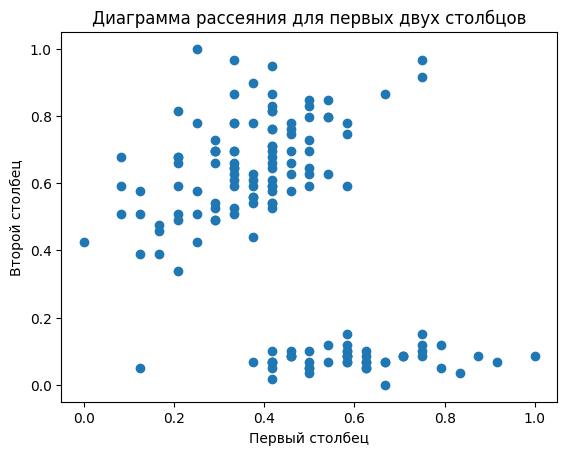

In [8]:
import matplotlib.pyplot as plt

x_values = X_scaled[:, 1] # Второй столбец
y_values = X_scaled[:, 2] # Третий столбец

plt.scatter(x_values, y_values)

plt.xlabel('Первый столбец')
plt.ylabel('Второй столбец')

plt.title('Диаграмма рассеяния для первых двух столбцов')

plt.show()

### Обработка категориальных признаков

В моём датасете нет категориальных признаков, поэтому я их синтезирую

In [9]:
import numpy as np

features = X_scaled[:, 0]


categorical_features = np.where(features < 0.33, 'red',
                                   np.where(features < 0.66, 'yellow', 'green'))


categorical_features

array(['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'yellow', 'yellow', 'red',
       'red', 'yellow', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'yellow', 'red',
       'red', 'yellow', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'green', 'yellow',
       'green', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'yellow',
       'red', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'green',
       'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow',
       'yellow', 'yellow', 'yellow', 'yellow', 'green', 'green', 'yellow',
       'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'yellow',
       'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow',
       'yellow', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'red',
       'yellow', 'yellow', 'yellow', 'green', 'yellow', 'yellow', 'green',
   

Label encoder

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

labled_features = le.fit_transform(categorical_features)
labled_features

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2])

One-hot-encoding

In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

one_hot_features = ohe.fit_transform(categorical_features.reshape(-1, 1))

one_hot_features

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1